In [4]:
import nltk
nltk.download('reuters')

[nltk_data] Downloading package reuters to /root/nltk_data...


True

In [5]:
from nltk.corpus import reuters
reuters.readme().replace('\n',' ')

'       The Reuters-21578 benchmark corpus, ApteMod version  This is a publically available version of the well-known Reuters-21578 "ApteMod" corpus for text categorization.  It has been used in publications like these:   * Yiming Yang and X. Liu. "A re-examination of text categorization    methods".  1999.  Proceedings of 22nd Annual International SIGIR.    http://citeseer.nj.nec.com/yang99reexamination.html   * Thorsten Joachims. "Text categorization with support vector    machines: learning with many relevant features".  1998. Proceedings    of ECML-98, 10th European Conference on Machine Learning.    http://citeseer.nj.nec.com/joachims98text.html  ApteMod is a collection of 10,788 documents from the Reuters financial newswire service, partitioned into a training set with 7769 documents and a test set with 3019 documents.  The total size of the corpus is about 43 MB.  It is also available for download from http://kdd.ics.uci.edu/databases/reuters21578/reuters21578.html , which inclu

In [6]:
len(reuters.fileids())

10788

In [7]:
reuters.categories()

['acq',
 'alum',
 'barley',
 'bop',
 'carcass',
 'castor-oil',
 'cocoa',
 'coconut',
 'coconut-oil',
 'coffee',
 'copper',
 'copra-cake',
 'corn',
 'cotton',
 'cotton-oil',
 'cpi',
 'cpu',
 'crude',
 'dfl',
 'dlr',
 'dmk',
 'earn',
 'fuel',
 'gas',
 'gnp',
 'gold',
 'grain',
 'groundnut',
 'groundnut-oil',
 'heat',
 'hog',
 'housing',
 'income',
 'instal-debt',
 'interest',
 'ipi',
 'iron-steel',
 'jet',
 'jobs',
 'l-cattle',
 'lead',
 'lei',
 'lin-oil',
 'livestock',
 'lumber',
 'meal-feed',
 'money-fx',
 'money-supply',
 'naphtha',
 'nat-gas',
 'nickel',
 'nkr',
 'nzdlr',
 'oat',
 'oilseed',
 'orange',
 'palladium',
 'palm-oil',
 'palmkernel',
 'pet-chem',
 'platinum',
 'potato',
 'propane',
 'rand',
 'rape-oil',
 'rapeseed',
 'reserves',
 'retail',
 'rice',
 'rubber',
 'rye',
 'ship',
 'silver',
 'sorghum',
 'soy-meal',
 'soy-oil',
 'soybean',
 'strategic-metal',
 'sugar',
 'sun-meal',
 'sun-oil',
 'sunseed',
 'tea',
 'tin',
 'trade',
 'veg-oil',
 'wheat',
 'wpi',
 'yen',
 'zinc']

In [8]:
print(reuters.words(categories='trade'))

['ASIAN', 'EXPORTERS', 'FEAR', 'DAMAGE', 'FROM', 'U', ...]


In [9]:
trade_words = reuters.words(categories='trade')
len(trade_words)

142723

In [10]:
trade_words_some  = trade_words[:100]
print(trade_words_some)

['ASIAN', 'EXPORTERS', 'FEAR', 'DAMAGE', 'FROM', 'U', ...]


In [13]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [14]:
trade_words_condensed = [w.lower() for w in trade_words_some if w.lower() not in stopwords.words('english')]
trade_words_condensed[:10]

['asian',
 'exporters',
 'fear',
 'damage',
 'u',
 '.',
 '.-',
 'japan',
 'rift',
 'mounting']

In [15]:
import string
punct_combo = [c + "\"" for c in string.punctuation ] + ["\"" + c for c in string.punctuation] + [".-", ":-", "..", "..."]
trade_words_condensed = [w for w in trade_words_condensed if w not in string.punctuation and w not in punct_combo]
trade_words_condensed

['asian',
 'exporters',
 'fear',
 'damage',
 'u',
 'japan',
 'rift',
 'mounting',
 'trade',
 'friction',
 'u',
 'japan',
 'raised',
 'fears',
 'among',
 'many',
 'asia',
 'exporting',
 'nations',
 'row',
 'could',
 'inflict',
 'far',
 'reaching',
 'economic',
 'damage',
 'businessmen',
 'officials',
 'said',
 'told',
 'reuter',
 'correspondents',
 'asian',
 'capitals',
 'u',
 'move',
 'japan',
 'might',
 'boost',
 'protectionist',
 'sentiment',
 'u',
 'lead',
 'curbs',
 'american',
 'imports',
 'products',
 'exporters',
 'said',
 'conflict',
 'would',
 'hurt',
 'long']

In [16]:
from nltk import bigrams
bi_trade_words_condensed = list(bigrams(trade_words_condensed))
bi_trade_words_condensed[:4]

[('asian', 'exporters'),
 ('exporters', 'fear'),
 ('fear', 'damage'),
 ('damage', 'u')]

In [18]:
from nltk import FreqDist
bi_fdist = FreqDist(bi_trade_words_condensed)
for key ,freq in bi_fdist.most_common(3):
  print(key, freq)

('u', 'japan') 2
('asian', 'exporters') 1
('exporters', 'fear') 1


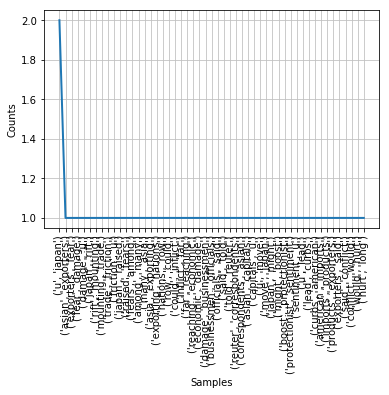

In [20]:
bi_fdist.plot()

Implementing Stemming

In [0]:
from nltk.stem import (PorterStemmer,LancasterStemmer)
from nltk.stem.snowball import SnowballStemmer #optimal stemmer
porter = PorterStemmer()
lancaster = LancasterStemmer()
snowball = SnowballStemmer('english')

In [24]:
print(porter.stem('Re-Generating'),lancaster.stem('Re-Generating'),snowball.stem('Re-Generating'))

re-gener re-generating re-gener


In [25]:
print(len(SnowballStemmer.languages))

16


In [0]:
from nltk import word_tokenize

In [27]:
sentence = 'The characteristic of a particular gasoline blend to resist igniting too early (which causes knocking and reduces efficiency in reciprocating engines) is measured by its octane rating which is produced in several grades. Tetraethyl lead and other lead compounds are no longer used in most areas to increase octane rating (still used in aviation and auto-racing)'
translator = str.maketrans('', '', string.punctuation)
translator

{33: None,
 34: None,
 35: None,
 36: None,
 37: None,
 38: None,
 39: None,
 40: None,
 41: None,
 42: None,
 43: None,
 44: None,
 45: None,
 46: None,
 47: None,
 58: None,
 59: None,
 60: None,
 61: None,
 62: None,
 63: None,
 64: None,
 91: None,
 92: None,
 93: None,
 94: None,
 95: None,
 96: None,
 123: None,
 124: None,
 125: None,
 126: None}

In [29]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [30]:
tokens = word_tokenize(sentence.translate(translator))
tokens[:10]

['The',
 'characteristic',
 'of',
 'a',
 'particular',
 'gasoline',
 'blend',
 'to',
 'resist',
 'igniting']

In [32]:
for stemmer in [porter,lancaster,snowball]:
  print('stemmers: ',[stemmer.stem(t) for t in tokens])

stemmers:  ['the', 'characterist', 'of', 'a', 'particular', 'gasolin', 'blend', 'to', 'resist', 'ignit', 'too', 'earli', 'which', 'caus', 'knock', 'and', 'reduc', 'effici', 'in', 'reciproc', 'engin', 'is', 'measur', 'by', 'it', 'octan', 'rate', 'which', 'is', 'produc', 'in', 'sever', 'grade', 'tetraethyl', 'lead', 'and', 'other', 'lead', 'compound', 'are', 'no', 'longer', 'use', 'in', 'most', 'area', 'to', 'increas', 'octan', 'rate', 'still', 'use', 'in', 'aviat', 'and', 'autorac']
stemmers:  ['the', 'charact', 'of', 'a', 'particul', 'gasolin', 'blend', 'to', 'resist', 'ignit', 'too', 'ear', 'which', 'caus', 'knock', 'and', 'reduc', 'efficy', 'in', 'reciproc', 'engin', 'is', 'meas', 'by', 'it', 'oct', 'rat', 'which', 'is', 'produc', 'in', 'sev', 'grad', 'tetraethyl', 'lead', 'and', 'oth', 'lead', 'compound', 'ar', 'no', 'long', 'us', 'in', 'most', 'area', 'to', 'increas', 'oct', 'rat', 'stil', 'us', 'in', 'avy', 'and', 'autorac']
stemmers:  ['the', 'characterist', 'of', 'a', 'particula

In [34]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [38]:
from nltk import WordNetLemmatizer
wnl = WordNetLemmatizer()
print(wnl.lemmatize('characteristics'),wnl.lemmatize('helping',pos = 'v'))

characteristic help
